In [1]:
from typing import Dict , TypedDict
from langgraph.graph import StateGraph,END,START

In [3]:
class AgentState(TypedDict):
    num1:int
    num2:int
    num3:int
    num4:int
    operation1:str
    operation2:str
    result1:int
    result2:int

In [16]:
def add_node1(state:AgentState)->AgentState:
    state["result1"]=state["num1"]+state["num2"]
    return state

def add_node2(state:AgentState)->AgentState:
    state["result2"]=state["num3"]+state["num4"]
    return state

def sub_node1(state:AgentState)->AgentState:
    state["result1"]=state["num1"]-state["num2"]
    return state

def sub_node2(state:AgentState)->AgentState:
    state["result2"]=state["num3"]-state["num4"]
    return state

def route1(state:AgentState)->AgentState:
    if state["operation1"]== "+":
        return "add_operation1"
    else :
        return "sub_operation1"
    
def route2(state:AgentState)->AgentState:
    if state["operation2"]== "+":
        return "add_operation2"
    else :
        return "sub_operation2"    


In [17]:
graph = StateGraph(AgentState)
graph.add_node("add_node1",add_node1)
graph.add_node("add_node2",add_node2)
graph.add_node("sub_node1",sub_node1)
graph.add_node("sub_node2",sub_node2)
graph.add_node("route1_",lambda state:state)
graph.add_node("route2",lambda state:state)


graph.add_edge(START,"route1_")

graph.add_conditional_edges(
    "route1_",
     route1,
    {
       "add_operation1":"add_node1",
       "sub_operation1":"sub_node1"
    }
)

graph.add_edge("add_node1","route2")
graph.add_edge("sub_node1","route2")

graph.add_conditional_edges(
    "route2",
    route2,
    {
       "add_operation2":"add_node2",
       "sub_operation2":"sub_node2" 
    }
)

graph.add_edge("add_node2",END)
graph.add_edge("sub_node2",END)

app= graph.compile()

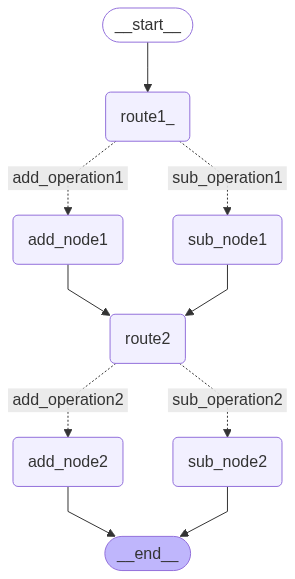

In [18]:
from IPython.display import Image , display 
display(Image(app.get_graph().draw_mermaid_png()))

In [19]:
para = AgentState(num1=3,num2=4,num3=4,num4=5,operation1="+",operation2="-",result1=0,result2=0
                  )
print(app.invoke(para))

{'num1': 3, 'num2': 4, 'num3': 4, 'num4': 5, 'operation1': '+', 'operation2': '-', 'result1': 7, 'result2': -1}
